## Clustering with K-Means

K-means is one of the simplest clustering algorithms. The K-means Algorithm consists in writing a program that proceeds as follows:

1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids. This can be done by randomly selecting K points from the dataset as the initial locations of the centroids;
3. Compute the distance of all the other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position. This can be done by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids do not change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you have repeated these steps for specified number of iterations (niter)

The algorithm is thus parameterized by the **number of clusters (K)**, the **maximum number of iterations** (niter), and the **tolerance threshold (tol)**.

### Step 1

Let us start by importing the necessary libraries. <br>
Import **numpy, Scipy, and pandas** using, respectively, the **aliases np, sc, and pd**.

In [1]:
import numpy as np 
import scipy as sc
import pandas as pd

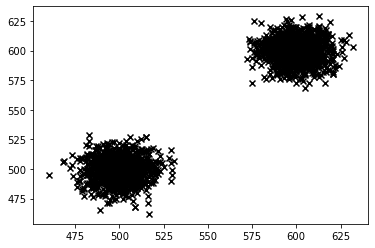

In [2]:
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point should not be picked up twice. <br>

**Show that our function performs as desired by calling it with** $K = 2$ **and on the data_test as the** $points$.

In [3]:
def init(points,K):
    
    # Choose 'K' number of random indexes from the 'points' array, without replacement
    random_positions = np.random.choice(len(points),size=K,replace=False)
    
    # Return values in array given obtained random indexes by slicing 'points' array
    return points[random_positions]

In [4]:
init(data_test,2)

array([[508, 494],
       [494, 495]], dtype=int64)

### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidian distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
For the assignment you can assume that $p1$ and $p2$ are two-dimensional ndarrays points. But in general, you should assume that p1 and p2 are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. 

**We can test our function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>

Write a function that computes the euclidian distance between two points of arbitrary dimension <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**Proof that function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

In [5]:
def distance(p1,p2):
    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**0.5

In [6]:
# Test variables do not change
p1 = np.array([1,3])
p2 = np.array([7,2])
print(f'The distance between (1,3) and (7,2) is: {distance(p1,p2)}')

The distance between (1,3) and (7,2) is: 6.082762530298219


In [7]:
def arbitrary_distance(p1,p2):
    
    # Create counter to add sums
    d2 = 0
    
    # Iterate though index positions of the same lenght as p1 (and p2) size 
    for i in range(len(p1)):
        
        # Sum the totality of computations for each pair of values for both points
        d2 += (p1[i]-p2[i])**2
        
    # To get the Euclidean distance, we need to take the square root of the squared distance
    return d2**0.5

In [8]:
print(f'The euclidian distance between (1,3,-9,12) and (7,2,0,5) is: {arbitrary_distance((1,3,-9,12),(7,2,0,5))}')

The euclidian distance between (1,3,-9,12) and (7,2,0,5) is: 12.922847983320086


### Step 4

Write a function named <b>centroid</b> that takes one argument: $points$.<br>

The argument $points$ should be a ndarray with the coordinates of a set of observations.<br>

The function <b>centroid</b> should return an ndarray with $d$ values (being $d$ the number of dimensions)</span>, the $n^{th}$ index of the returned output ndarray should thus correspond to the averaged of the values in the $n^{th}$ column of the points ndarray. In other words, correspond to the average position along a specific dimension of observations in $points$.</span>

**Test our function and check that it works by using the ndarray TEST**


In [9]:
def centroid(points):
    '''
    Compute the mean for every column (dimension) of the array (axis=0)
    Return an ndarray with length equal to the number of dimensions in 'points'
    '''
    return np.mean(points,axis=0)

In [10]:
# Test variables do not change the values
TEST = np.array([[1,2,3,4,5],[0,0,1,1,1],[0,1,2,4,5]])
print(TEST)

[[1 2 3 4 5]
 [0 0 1 1 1]
 [0 1 2 4 5]]


In [11]:
print(f'Centroid along each dimension is : {centroid(TEST)}')

Centroid along each dimension is : [0.33333333 1.         2.         3.         3.66666667]


### Step 5

Write a function <b>cupdate</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 

The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).<br>

The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.<br>

Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the total number of clusters.

The function <b>cupdate</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points (dimensions) and length K (rows).

**Test our function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [12]:
def cupdate(points, clusters):
    
    # Calculate the number of clusters (K)
    K = np.max(clusters) + 1 
    
    # Use list comprehension and previously created 'centroid' func to find centroid for each cluster
    centroids = np.array([centroid(points[clusters == k]) for k in range(K)])

    return centroids

In [13]:
# Test variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [14]:
cen = cupdate(p,c)
print('Generated centroids in test:')
print(cen)

Generated centroids in test:
[[0.44995487 0.55986467]
 [0.53760985 0.53912646]
 [0.8922063  0.26672425]]


### Step 6

Write a function <b>pupdate</b> that takes two input arguments: $points$ and $centroids$.<br>

The function <b>pupdate</b> should return a one-dimensional ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a *$d$ by $k$* distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test our function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [15]:
def pupdate(points, centroids):
    
    # Initialize an array to store the assigned cluster indices as integers since 'append' would convert into float
    centroid_index = np.array([],dtype=int)

    # Iterate through each point in the 'points' array
    for point in points:
        
        # Calculate the distances from the 'point' to all 'centroids' and store in an array
        distances = np.array([distance(point, centroid) for centroid in centroids])

        # Find the index of the centroid with the minimum distance (closest centroid)
        closest_centroid = int(np.argmin(distances))

        # Append the index of the closest centroid to the 'centroid_index' array
        centroid_index = np.append(centroid_index, closest_centroid)

    return centroid_index

In [16]:
pupdate(p,cen)

array([2, 0, 0, 1, 2, 0, 1, 1, 0, 0])

### Step 7

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>

The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidian distance (the square error) between the old and new positions of each centroid.  This will give us a quantity that tell us whether our algorithm is still converging to the solution or  got to good approximation.</span> We will use the function error to obtain an estimate of whether the algorithm is still converging to the solution (that is the centroids are, in average, moving a lot) or if we entered a scenario of small steps (that is the centroids are, in average, not moving that much). 

We will use this information combined with a **tolerance threshold** in regards to the average change in the centroids positions to decide if it is a good time to stop the algorithm. You should make this decision.


**Test our function and then report the distance between the centroids computed in Step 5, cen, and the centroids that you can compute using the function cupdate with the arguments points and new_clusters.**

In [17]:
def error(oldcentroids, newcentroids):
    
    # Initialize an array to store squared distances
    distances_2 = np.array([])

    # Iterate through each pair of old and new centroids
    for i in range(len(oldcentroids)):
        
        # Calculate the squared distance between the old and new centroids
        dist_old_new = distance(oldcentroids[i], newcentroids[i]) ** 2

        # Append the squared distance to the 'distances_2' array
        distances_2 = np.append(distances_2, dist_old_new)

    # Calculate the average squared error
    square_error = np.mean(distances_2)

    return square_error

In [18]:
old_centroids = cen
new_centroids = cupdate(p,pupdate(p,cen))

error(old_centroids,new_centroids)

0.035278311724246704

### Step 8

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared previously to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

**You will need to make some decisions about the best approach to select the correct range of values to pass to init(),  particularly pay attention to the values given for K, as K-Means is extremely sensitive to the number of centroids being chosen. Justify your decision.**

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that our algorithm returns an error. Although that should not happen with the examples provided, we might want to consider implementing some heuristics to overcome those errors.**

In [19]:
def kmeans(points, niter, tol, K=2):
    
    # Find centroids using the 'init' function
    centroids = init(points, K)
    
    for i in range(niter):
        
        # Assign points to the closest centroids using the 'pupdate' function
        clusters = pupdate(points, centroids)
        
        # Update the centroids using the 'cupdate' function
        centroids_updated = cupdate(points, clusters)
        
        # Calculate the squared error between old and new centroids
        square_error = error(centroids, centroids_updated)
        
        # Break 'for' loop if the error is greater than the tolerance threshold
        if square_error > tol:
            break
        
        # Update centroids for next iteration
        centroids = centroids_updated

    return clusters, centroids

In [20]:
kmeans(p,niter=500,tol=0.00001,K=2)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
 array([[0.33253499, 0.18923898],
        [0.07461196, 0.74290527]]))

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how we can visualize our results for a sample dataset. <br>

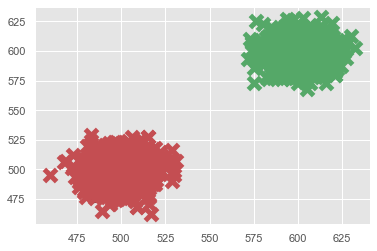

In [34]:
# Adapted Example
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# Define clusters & centroids based on data from 'kmeans' function and data_test
clusters, centroids = kmeans(data_test, K=2, niter=500, tol=0.00001)

# plot each point in the centroids array
for centroid_ in centroids:
    plt.scatter(centroid_[0],centroid_[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(data_test[i,0],data_test[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# plot all elements
plt.show()

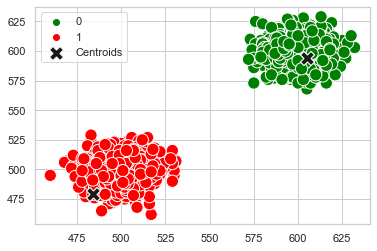

In [37]:
# Homework visualization using Seaborn
import seaborn as sns

# Clusters & Centroids defined above

# Set style
sns.set(style="whitegrid")

# Set custom palette with specific colors for each cluster
custom_palette = {0: 'green', 1: 'red'}

# Plot each point in the data_test array, colored according to the cluster they belong
sns.scatterplot(x=data_test[:, 0], y=data_test[:, 1], hue=clusters, palette=custom_palette, s=150)

# Plot each centroid
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color="k", marker="X", s=200,label='Centroids')

# Show the plot and legend
plt.legend()
plt.show()

### Step 9

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is a 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared Euclidean distance** of the points to the centroid of the cluster they are assigned.
The Squared of the Euclidean distance is a common measure of error that satisfies several important properties, namely it is strictly convex and smooth. It is often used in the method of Least Squares to fit linear functions to data, in which we try to find the parameters of a linear model that minimize the average of the square distances between the observed values and the values predicted by the fitted model. Here we are borrowing these concepts to measure the dispersion of points in a cluster, in other words, the error between the position of the centroid and the locations of the points associated with it.

**Test our function and report the results of using point=p, clusters=c, and centroids=cen. These are the variables that we have used in the previous steps.**

<span style="color:red">**Note: distance always refers to the euclidean distance.**</span>

In [23]:
def inertia(points, clusters, centroids):
    
    # Calculate the number of clusters
    k = np.max(clusters) + 1
    
    # Initialize empty array to store distances
    squared_distances = np.array([])

    # Calculate squared distances for each cluster
    for i in range(k):
        
        # Extract points belonging to the current cluster
        cluster_points = points[clusters == i]

        # Calculate and append the squared distances for each point in the cluster
        squared_distances = np.append(squared_distances, np.sum((cluster_points - centroids[i])**2))

    # Calculate the average squared distance
    average_squared_distance = np.mean(squared_distances)
    
    return k, average_squared_distance

In [24]:
inertia(p,c,cen)

(3, 0.3651403276028203)

### Step 10

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>inertia</b> to identify the most suitable number of clusters. <br>
- Inspect visually the dataset before performing the clustering.
- Report the inertia values as a line plot.
- Show the result of our clustering.

***Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).***

In [25]:
arr = pd.read_csv('https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1').to_numpy()
arr

array([[665845, 557965],
       [597173, 575538],
       [618600, 551446],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]], dtype=int64)

<AxesSubplot:>

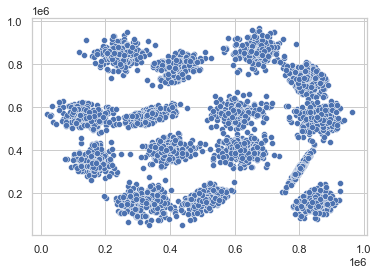

In [26]:
# Visualize the array in a scatter plot
sns.scatterplot(x=arr[:,0],y=arr[:,1])

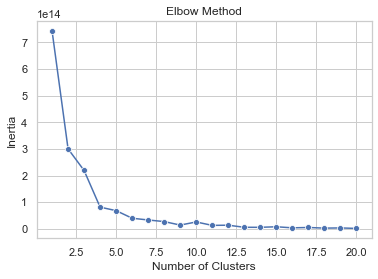

In [31]:
# Use the output of inertia to perform and visualize the elbow method 
# Set total number of clusters for testing
Total_Clusters = range(1,21)

# Set values for number of iterations in 'kmeans' function and tolerance level for error
niter = 500
tol = 0.00001

# Initialize lists to store the number of clusters and inertia values
num_clusters = []
inertia_values = []

# Calculate inertia for different cluster values
for K in Total_Clusters:
    clusters, centroids = kmeans(arr, niter, tol, K)
    k, average_squared_distance = inertia(arr, clusters, centroids)
    num_clusters.append(k)
    inertia_values.append(average_squared_distance)
    
# We could calculate the explained variation or use the inertia values, equivalent interpretation
# Example -> explained_variation = [100 * (1 - (avg / inertia_values[0])) for avg in inertia_values]
# While the inertia (or distortions) gives us an elbow pointing downwards, the explained variation shows an elbow pointing up
# We will use the inertia values

sns.set_style('whitegrid')
sns.lineplot(x=num_clusters, y=inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

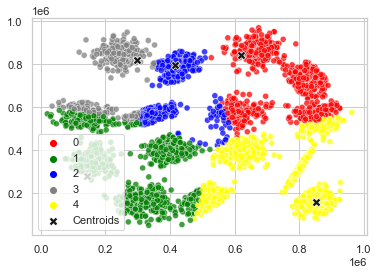

In [28]:
# Based on the graph we choose 5 clusters since it seems to be an appropriate cut-off point
# From this point on the reduction in inertia for the model appears to be diminishing
# Same procedure as before but now we have 5 clusters and new data set
clusters, centroids = kmeans(arr, K=5, niter=500, tol=0.00001)

# Set style
sns.set(style="whitegrid")

# Set custom palette with specific colors for each cluster
custom_palette = {0: 'red', 1: 'green', 2: 'blue', 3:'grey', 4:'yellow'}

# Plot each point in the data_test array, colored according to the cluster they belong
sns.scatterplot(x=arr[:, 0], y=arr[:, 1], hue=clusters, palette=custom_palette,alpha=0.75)

# Plot each centroid
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color="k", marker="X", s=75,label='Centroids')

# Show the plot and legend
plt.legend()
plt.show()